In [501]:
#importing required libraries
import pandas as pd
import numpy as np

In [502]:
df = pd.read_csv("Data_Train.csv")

In [503]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<!Doctype html>
<html>
    <h1>1.EDA</h1>

<!Doctype html>
<html>
    <h2>Data cleaning</h2>

In [504]:
#checking NaN values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [505]:
#removing New_Price column as it contains more null values
data = pd.DataFrame(df,columns=['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'])

In [506]:
#removing null values for Mileage by filling with mean
data['Mileage']=data['Mileage'].str.split(" ").str[0].astype('float64')#splitting the value and units and accessing only values
data['Mileage']=data['Mileage'].fillna(np.mean(data['Mileage']))

In [507]:
#removing null values for Engine by filling with mean
data['Engine']=data['Engine'].str.split(" ").str[0].astype('float64') #splitting the value and units and accessing only values
data['Engine']=data['Engine'].fillna(np.mean(data['Engine']))

In [508]:
#removing null values for Seats by filling with mode
from scipy import stats
c= stats.mode(data['Seats'])
data['Seats'] = data['Seats'].fillna(c.mode[0])
data.loc[data.Seats == 0,'Seats'] = c.mode[0]          #replacing zero seats with mode 

In [509]:
#removing NaN values for Power by filling with mean
data['Power']=data['Power'].str.split(" ").str[0]
data.loc[data.Power == 'null','Power'] = '0'       #replacing 'null' string with '0'
data['Power']=data['Power'].astype('float64')      #converting to float
x=np.mean(data['Power'])
data['Power']=data['Power'].fillna(x)              #filling with mean
data.loc[data.Power == 0.00,'Power'] = x           #fillig 0.00 values with mean

In [510]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.204930,5.277621,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,53.231913,0.803479,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [511]:
#replacing 'ISUZU' from name column with 'Isuzu'
data['Name'] = data['Name'].str.split()
x = data.loc[data.Name.str[0] == 'ISUZU','Name']
for i in x.index:
    data['Name'][i][0] = 'Isuzu'

#replacing Land with Land Rover
y = data.loc[data.Name.str[0] == 'Land','Name']
for i in y.index:
   data['Name'][i][0] += data['Name'][i][1]
   del data['Name'][i][1]

#adding company column  to data with car names
data['Company'] = data['Name'].str[0]
for i in range(len(data['Name'])):
    del data['Name'][i][0]
data['Name'] = data['Name'].str.join(' ')

#removing Name column
col=list(data.columns)
col.remove('Name')
data = pd.DataFrame(data,columns=col)

In [512]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


<!Doctype html>
<html>
    <h2>Finding and removing outliers</h2>

In [513]:
# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

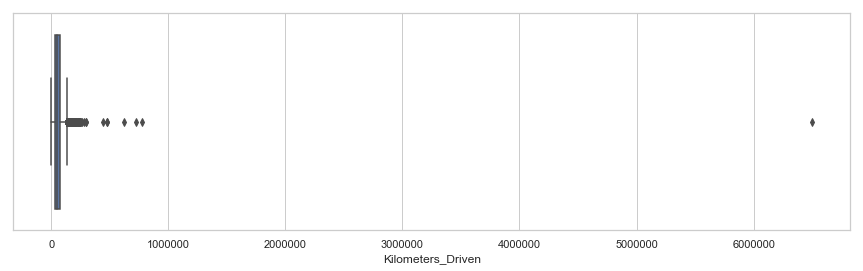

In [514]:
#finding outliers of  Kilometers_Driven using boxplot
plt.figure(figsize=(15,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Kilometers_Driven']);

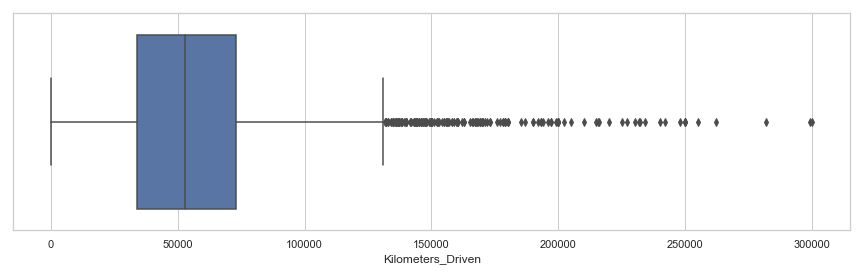

In [515]:
#replacing the outliers with 95th percentile value 
upper_lim = data['Kilometers_Driven'].quantile(.95)
data.loc[(data['Kilometers_Driven'] > 300000),'Kilometers_Driven'] = upper_lim

#plotting graph after removing outliers
plt.figure(figsize=(15,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Kilometers_Driven']);

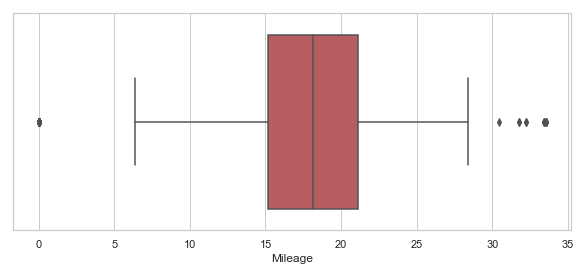

In [516]:
#finding outliers of  Mileage using boxplot
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Mileage'],color="r");

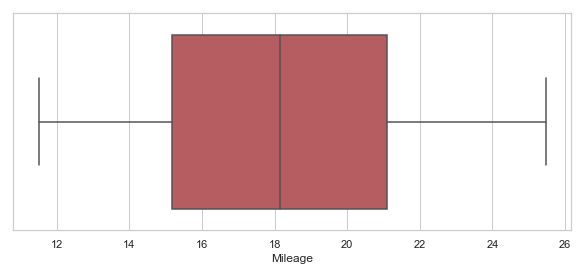

In [517]:
#replacing the outliers with 95th percentile value and 0.5th percentile value
upper_lim = data['Mileage'].quantile(.95)
lower_lim = data['Mileage'].quantile(.05)
data.loc[(data['Mileage'] > upper_lim),'Mileage'] = upper_lim
data.loc[(data['Mileage'] < lower_lim),'Mileage'] = lower_lim

#plotting graph after removing outliers
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Mileage'],color="r");

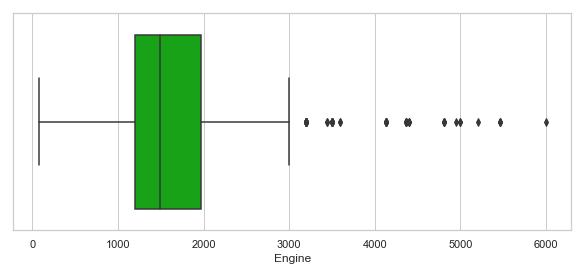

In [518]:
#finding outliers of  Engine using boxplot
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Engine'],color="#00b900");

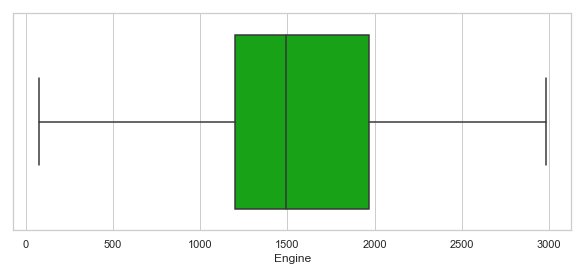

In [519]:
#replacing the outliers with 95th percentile value 
upper_lim = data['Engine'].quantile(.95)
data.loc[(data['Engine'] > upper_lim),'Engine'] = upper_lim

#plotting graph after removing outliers
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Engine'],color="#00b900");

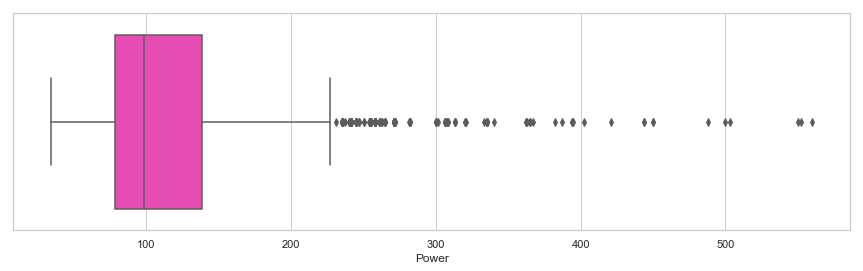

In [520]:
#finding outliers of  Power using boxplot
plt.figure(figsize=(15,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Power'],color="#ff33bb");

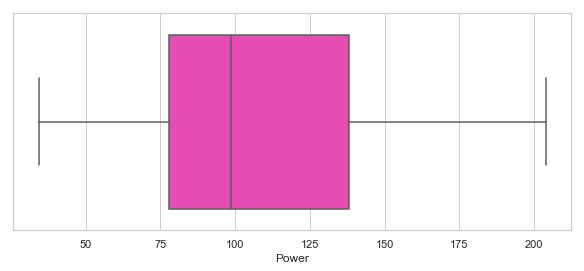

In [521]:
#replacing the outliers with 95th percentile value
upper_lim = data['Power'].quantile(.95)
data.loc[(data['Power'] > upper_lim),'Power'] = upper_lim

#plotting graph after removing outliers
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
sns.boxplot( x= data['Power'],color="#ff33bb");

<!Doctype html>
<html>
    <h2>Visualizing the relationship between Price and other coiumns</h2>

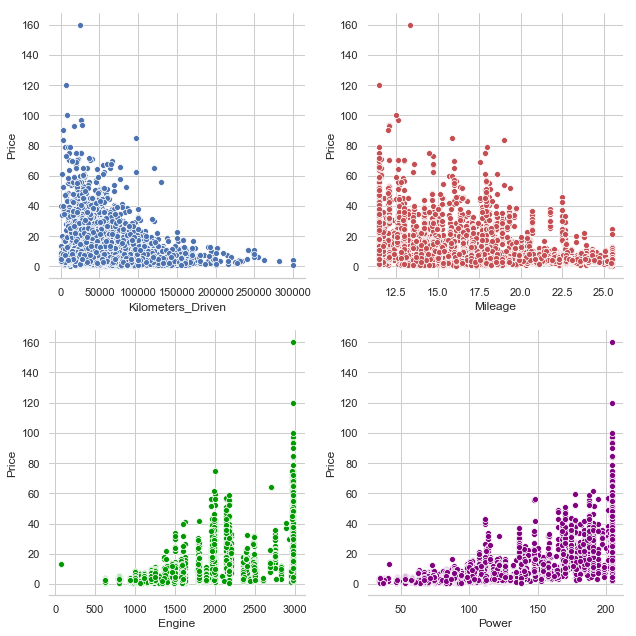

In [522]:
#finding the relationship of coliumns with price
fig, axs = plt.subplots(2, 2,figsize=(9, 9))
sns.despine(left=True)
sns.set(style="darkgrid")
sns.relplot(x= 'Kilometers_Driven',y='Price',data = data,ax=axs[0, 0]);
sns.relplot(x= 'Mileage',y='Price',data = data,ax=axs[0,1],color="r")
sns.relplot(x= 'Engine',y='Price',data = data,ax=axs[1,0],color="#009900")
sns.relplot(x= 'Power',y='Price',data = data,ax=axs[1,1],color="#800080");
fig.tight_layout()
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

<!Doctype html>
<html>
    <h4>Since the data is scattered with respect to Price it is better to use Random forest algorithm</h4>

<!Doctype html>
<html>
    <h1>2.Data Preprocessing</h1>

In [523]:
data.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000.0,CNG,Manual,First,25.47,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [524]:
#doing one hot encoding for required columns
list_onehot = ['Company','Location','Fuel_Type','Owner_Type','Transmission']
for i in list_onehot:
    encoded_columns = pd.get_dummies(data[i])
    data = data.join(encoded_columns).drop(i, axis=1)

In [525]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()          # instantiate labelencoder object

In [526]:
categorical_cols=['Year','Seats']
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [527]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ambassador,Audi,BMW,...,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third,Automatic,Manual
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.00000,...,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,15.358199,57213.210002,18.223620,1611.336593,110.095386,2.280279,9.479468,0.000166,0.039209,0.04436,...,0.532480,0.000332,0.001661,0.456222,0.818907,0.001495,0.160824,0.018774,0.285762,0.714238
std,3.269742,33819.001130,3.972425,563.465771,43.495339,0.794231,11.187917,0.012890,0.194108,0.20591,...,0.498985,0.018227,0.040730,0.498121,0.385127,0.038643,0.367399,0.135737,0.451814,0.451814
min,0.000000,171.000000,11.500000,72.000000,34.200000,0.000000,0.440000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,34000.000000,15.170000,1198.000000,78.000000,2.000000,3.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,53000.000000,18.150000,1493.000000,98.600000,2.000000,5.640000,0.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18.000000,73000.000000,21.100000,1969.000000,138.030000,2.000000,9.950000,0.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,21.000000,300000.000000,25.470000,2982.000000,204.000000,7.000000,160.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [528]:
#importing required library in order to do normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [529]:
Engine_numpy = data['Engine'].to_numpy().reshape(-1,1)  #coverting Engine to numpy array and reshaping to 6019x1
data['Engine'] = scaler.fit_transform(X = Engine_numpy) #normalization

In [530]:
kd_numpy = data['Kilometers_Driven'].to_numpy().reshape(-1,1)#coverting Kilometers_Driven to numpyarray and reshaping to 6019x1
data['Kilometers_Driven'] = scaler.fit_transform(X = kd_numpy)  #normalization

In [531]:
Power_numpy =data['Power'].to_numpy().reshape(-1,1)       #coverting Power to numpy array and reshaping to 6019x1
data['Power'] = scaler.fit_transform(X = Power_numpy)   #normalization

In [532]:
data.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ambassador,Audi,BMW,...,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third,Automatic,Manual
0,12,0.437270,25.47,-1.088598,-1.194144,2,1.75,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,17,-0.479451,19.67,-0.052069,0.370291,2,12.50,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,13,-0.331593,18.20,-0.731847,-0.491942,2,4.50,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,14,0.880844,20.77,-0.644878,-0.490562,4,6.00,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,15,-0.489210,15.20,0.633034,0.705987,2,17.74,0,1,0,...,1,0,0,0,0,0,1,0,1,0


In [533]:
#removing price column from data 
data_column = list(data.columns)
data_column.remove('Price')
X = data[data_column].values

<!Doctype html>
<html>
    <h1>3.Training data</h1>

In [534]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['Price'], test_size=0.2, random_state=0)

In [535]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [536]:
#training data
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [537]:
#predicting data
y_pred = clf.predict(X_test)

In [538]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6416166943521595
Mean Squared Error: 15.385604173714933
Root Mean Squared Error: 3.9224487471112908


In [539]:
df_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [540]:
import sklearn.metrics
metrics.r2_score(y_test,y_pred)

0.8716571933003502